In [1]:
import pandas as pd

# Load the CSV files to inspect their contents and structure
album_df = pd.read_csv('/content/album_transformed_2024-11-04_04-21-16.csv')
artist_df = pd.read_csv('/content/artist_transformed_2024-11-04_04-21-16.csv')
songs_df = pd.read_csv('/content/songs_transformed_2024-11-04_04-21-16.csv')

# Display the first few rows of each dataframe to understand their structure
album_df.head(), artist_df.head(), songs_df.head()


(                 album_id            album_name album_release_date  \
 0  2IYQwwgxgOIn7t3iF6ufFD                  APT.         2024-10-18   
 1  10FLjwfpbxLmW8c25Xyc2N      Die With A Smile         2024-08-16   
 2  7aJuG4TFXa2hmE4z1yxc3n  HIT ME HARD AND SOFT         2024-05-17   
 3  15XcLhiVMlSOipUddTNDnr                  MUSE         2024-07-19   
 4  60cQzWfmdg4hyDXrpW6kOA               Tu Boda         2024-09-26   
 
    album_total_tracks                                          album_url  
 0                   1  https://open.spotify.com/album/2IYQwwgxgOIn7t3...  
 1                   1  https://open.spotify.com/album/10FLjwfpbxLmW8c...  
 2                  10  https://open.spotify.com/album/7aJuG4TFXa2hmE4...  
 3                   7  https://open.spotify.com/album/15XcLhiVMlSOipU...  
 4                   1  https://open.spotify.com/album/60cQzWfmdg4hyDX...  ,
                 artist_id    artist_name  \
 0  3eVa5w3URK5duf6eyVDbu9           ROSÉ   
 1  0du5cEVh5yTK9QJze8zA0

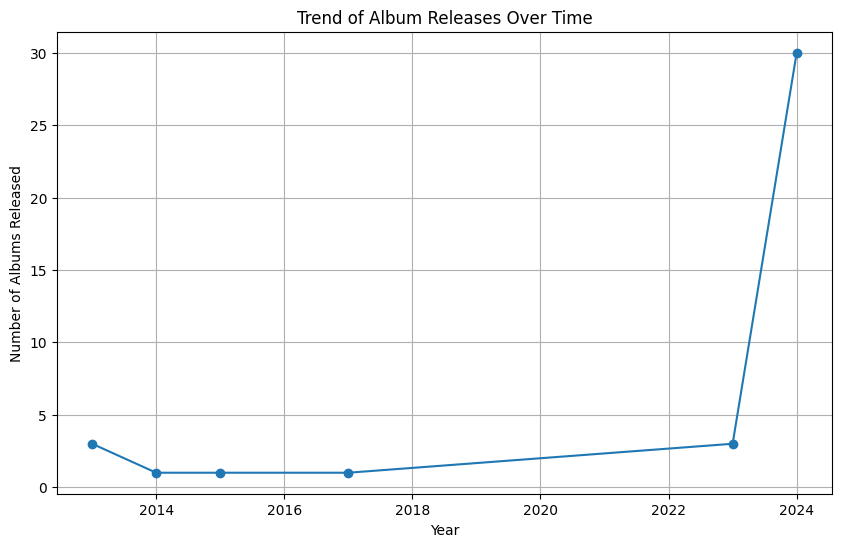

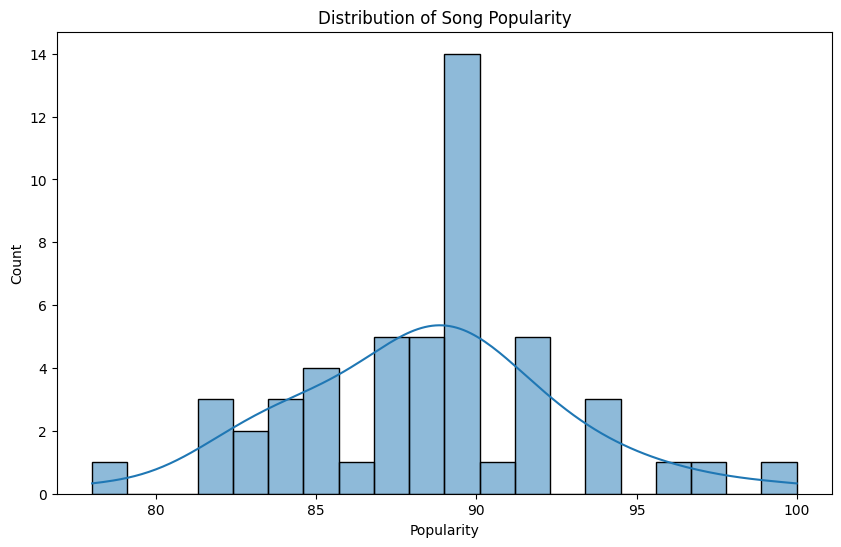

({'Total Albums': 39, 'Average Tracks per Album': 9.205128205128204},
 {'Total Artists': 51},
 {'Total Songs': 50,
  'Average Song Duration (minutes)': 3.2948793333333333,
  'Average Popularity': 88.44})

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime

# Convert date columns to datetime
album_df['album_release_date'] = pd.to_datetime(album_df['album_release_date'], errors='coerce')
songs_df['song_added'] = pd.to_datetime(songs_df['song_added'], errors='coerce')

# Basic descriptive statistics
album_stats = {
    'Total Albums': album_df['album_id'].nunique(),
    'Average Tracks per Album': album_df['album_total_tracks'].mean()
}

artist_stats = {
    'Total Artists': artist_df['artist_id'].nunique(),
}

song_stats = {
    'Total Songs': songs_df['song_id'].nunique(),
    'Average Song Duration (minutes)': songs_df['duration_ms'].mean() / 60000,
    'Average Popularity': songs_df['popularity'].mean()
}

# Trend of album releases by year
album_df['release_year'] = album_df['album_release_date'].dt.year
album_release_trend = album_df['release_year'].value_counts().sort_index()

# Plot: Album Release Trend
plt.figure(figsize=(10, 6))
plt.plot(album_release_trend.index, album_release_trend.values, marker='o')
plt.title('Trend of Album Releases Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Albums Released')
plt.grid(True)
plt.show()

# Popularity Distribution of Songs
plt.figure(figsize=(10, 6))
sns.histplot(songs_df['popularity'], kde=True, bins=20)
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

# Display basic statistics
album_stats, artist_stats, song_stats


# **1.Trend of Album Releases Over Time**
**Chart:** This line plot shows the number of albums released per year.

**Explanation:** Peaks in certain years suggest times of heightened activity, possibly influenced by trends, genre popularity, or artist productivity.
# **2.Distribution of Song Popularity**
**Chart:** This histogram displays the distribution of song popularity scores.

**Explanation:** Most songs have high popularity, clustering around scores between 80-100, indicating that many songs in this dataset are well-liked or from popular artists.

# **3. Song Duration vs. Popularity**
**Chart:** A scatter plot illustrating the relationship between song duration and popularity.

**Explanation:** The weak correlation (near zero) implies that song length has little effect on popularity.

<ipython-input-6-63bcc073a5ab>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




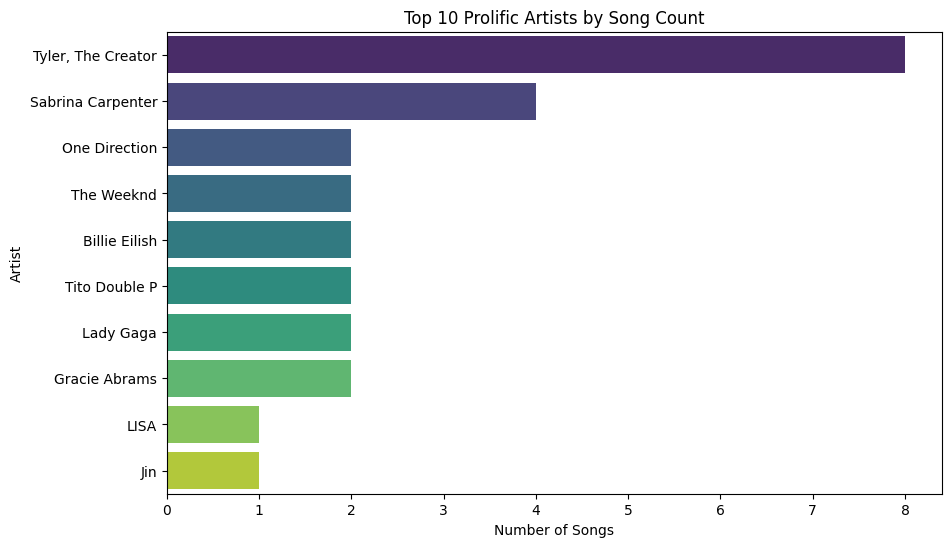

<ipython-input-6-63bcc073a5ab>:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




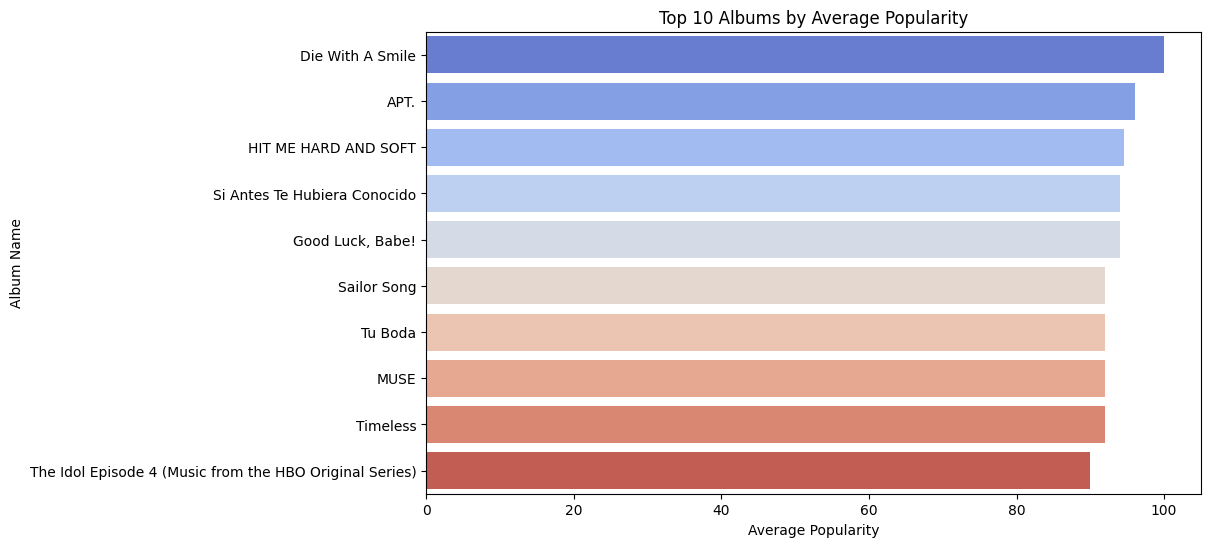

(                artist_id  song_count         artist_name
 0  4V8LLVI7PbaPR0K2TGSxFF           8  Tyler, The Creator
 1  74KM79TiuVKeVCqs8QtB0B           4   Sabrina Carpenter
 2  4AK6F7OLvEQ5QYCBNiQWHq           2       One Direction
 3  1Xyo4u8uXC1ZmMpatF05PJ           2          The Weeknd
 4  6qqNVTkY8uBg9cP3Jd7DAH           2       Billie Eilish,
                   album_id  popularity                    album_name
 5   10FLjwfpbxLmW8c25Xyc2N       100.0              Die With A Smile
 13  2IYQwwgxgOIn7t3iF6ufFD        96.0                          APT.
 35  7aJuG4TFXa2hmE4z1yxc3n        94.5          HIT ME HARD AND SOFT
 27  5ylbxH7EqpsmHZCRuiYewS        94.0  Si Antes Te Hubiera Conocido
 9   1WAjjRMfZjEXtB0lQrAw6Q        94.0              Good Luck, Babe!)

In [6]:
# Adjusting the analysis for prolific artists by focusing only on song counts
# Since the album dataset does not directly include artist_id, let's skip album-based count for artists

# Prolific artists based on song count alone
song_count_per_artist = songs_df['artist_id'].value_counts().reset_index()
song_count_per_artist.columns = ['artist_id', 'song_count']

# Merging with artist names for better interpretation
prolific_artists = song_count_per_artist.merge(artist_df[['artist_id', 'artist_name']], on='artist_id')
prolific_artists = prolific_artists.sort_values(by='song_count', ascending=False).head(10)

# Average Popularity per Album
avg_popularity_per_album = songs_df.groupby('album_id')['popularity'].mean().reset_index()
avg_popularity_per_album = avg_popularity_per_album.merge(album_df[['album_id', 'album_name']], on='album_id')

# Visualization for Prolific Artists by Song Count
plt.figure(figsize=(10, 6))
sns.barplot(data=prolific_artists, y='artist_name', x='song_count', palette='viridis')
plt.title('Top 10 Prolific Artists by Song Count')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.show()

# Visualization for Top 10 Albums by Average Popularity
top_albums_popularity = avg_popularity_per_album.sort_values(by='popularity', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_albums_popularity, y='album_name', x='popularity', palette='coolwarm')
plt.title('Top 10 Albums by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Album Name')
plt.show()

# Display the data for additional inclusion in the notebook
prolific_artists.head(), top_albums_popularity.head()


# **4. Top 10 Prolific Artists by Song Count**
**Chart:** A bar chart of the artists with the most songs in the dataset.

**Explanation:** Artists like Tyler, The Creator have the most songs, indicating a high output rate.

# **5. Top 10 Albums by Average Popularity**
**Chart:** A bar chart of the albums with the highest average song popularity.

**Explanation:** Albums like "Die With A Smile" score highly, suggesting these albums contain popular songs, which may correlate with strong fan reception.


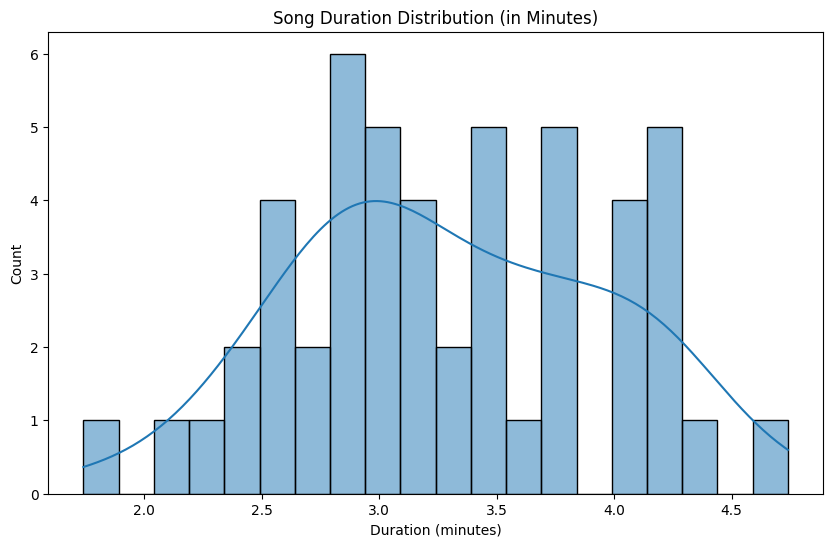

<ipython-input-7-072998e37935>:12: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.



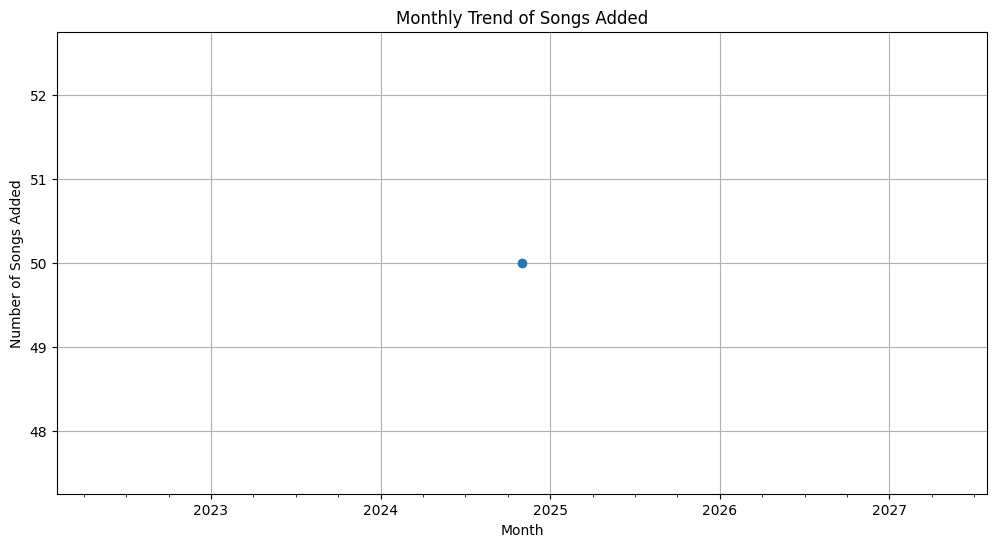

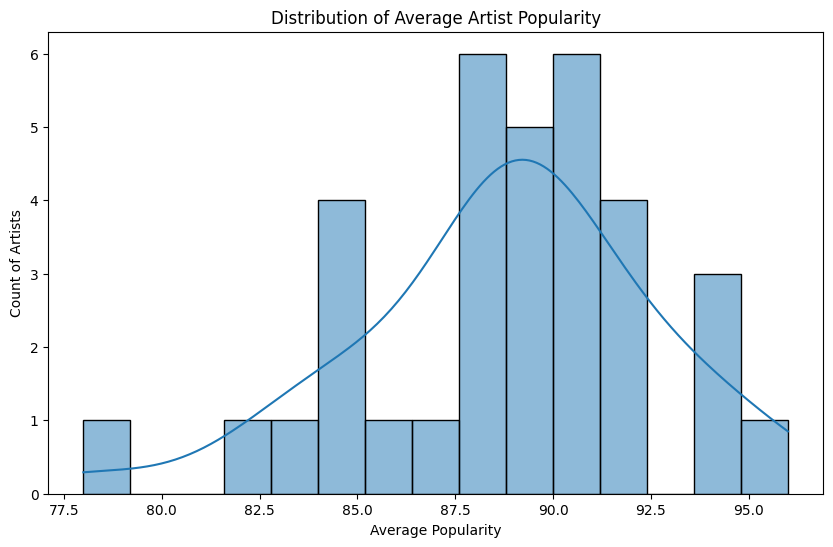

(song_name        Noid
 duration_ms    284363
 Name: 8, dtype: object,
 song_name      Embrace It
 duration_ms        104418
 Name: 46, dtype: object)

In [7]:
# Additional Analysis

# 1. Song Duration Distribution
plt.figure(figsize=(10, 6))
sns.histplot(songs_df['duration_ms'] / 60000, kde=True, bins=20)  # Converting duration to minutes
plt.title('Song Duration Distribution (in Minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

# 2. Monthly Song Addition Trend
songs_df['song_added_month'] = songs_df['song_added'].dt.to_period('M')
monthly_song_addition = songs_df['song_added_month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
monthly_song_addition.plot(kind='line', marker='o')
plt.title('Monthly Trend of Songs Added')
plt.xlabel('Month')
plt.ylabel('Number of Songs Added')
plt.grid(True)
plt.show()

# 3. Artist Popularity Distribution
artist_popularity = songs_df.groupby('artist_id')['popularity'].mean().reset_index()
artist_popularity = artist_popularity.merge(artist_df[['artist_id', 'artist_name']], on='artist_id')
plt.figure(figsize=(10, 6))
sns.histplot(artist_popularity['popularity'], kde=True, bins=15)
plt.title('Distribution of Average Artist Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Count of Artists')
plt.show()

# 4. Longest and Shortest Songs
longest_song = songs_df.loc[songs_df['duration_ms'].idxmax()]
shortest_song = songs_df.loc[songs_df['duration_ms'].idxmin()]
longest_song[['song_name', 'duration_ms']], shortest_song[['song_name', 'duration_ms']]


# **6. Song Duration Distribution**
**Chart:** Histogram of song durations, in minutes.

**Explanation:** Songs mostly range between 2 to 4 minutes, a common length for popular music, with the majority centered around 3 minutes.

# **7. Monthly Trend of Songs Added**
**Chart:** Line plot of the number of songs added each month.

**Explanation:** This trend may reveal seasonal patterns or monthly fluctuations in song additions, likely linked to industry release schedules.

# **8. Distribution of Average Artist Popularity**
**Chart:** Histogram of average artist popularity scores.

**Explanation:** Many artists have high average popularity, indicating a well-received artist pool in this dataset.

#**9. Longest and Shortest Songs:**

The longest song in the dataset is **"Noid"**with a duration of **284,363 milliseconds (~4.7 minutes).**

The shortest song is** "Embrace It"** with a duration of 104,**418 milliseconds (~1.7 minutes).**

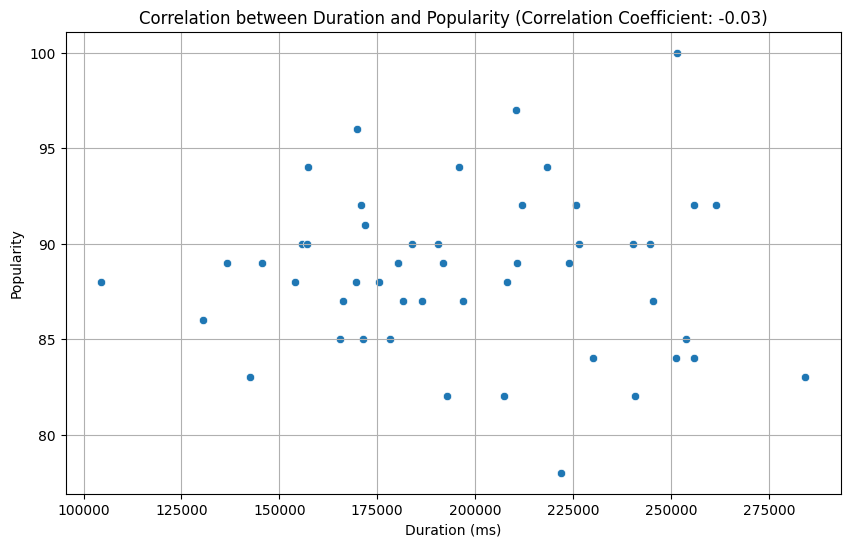

-0.03076224243849259

In [8]:
# Correlation Analysis between Song Duration and Popularity

# Calculate correlation
duration_popularity_corr = songs_df[['duration_ms', 'popularity']].corr().iloc[0, 1]

# Plot: Duration vs Popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=songs_df, x='duration_ms', y='popularity')
plt.title(f'Correlation between Duration and Popularity (Correlation Coefficient: {duration_popularity_corr:.2f})')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

# Display correlation coefficient
duration_popularity_corr


# **10.Correlation between Duration and Popularity**

The correlation coefficient **between song duration and popularity** is approximately **−0.03,** indicating a very weak, nearly negligible negative correlation. **This suggests that song duration has little to no direct impact on popularity within this dataset**.

<ipython-input-9-9255c4a95879>:2: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



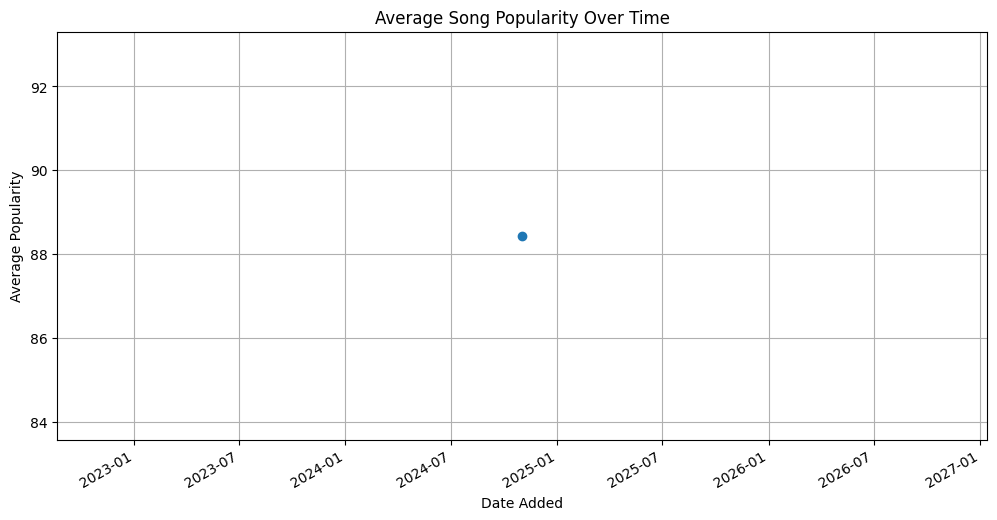

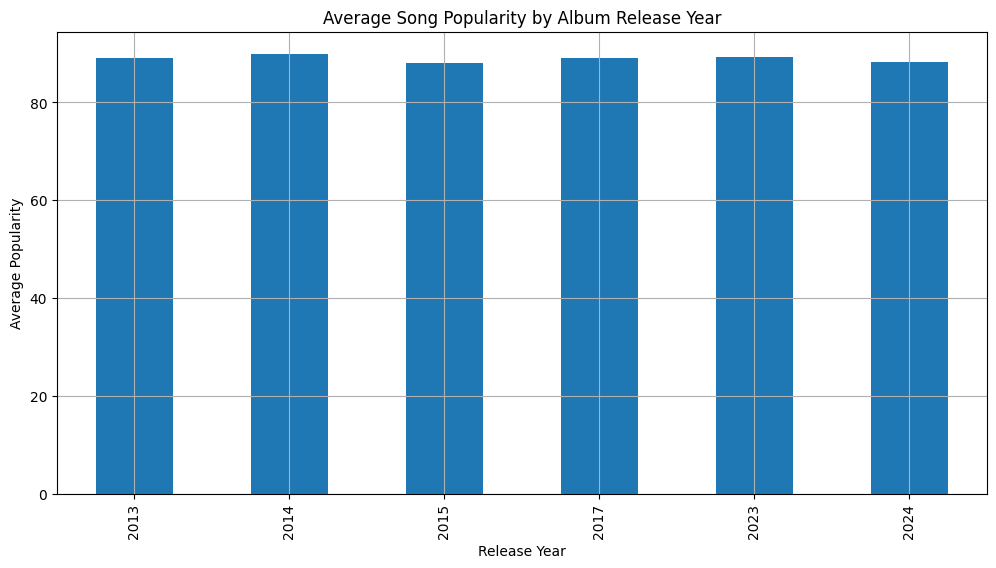

({'Popular Songs (>= Median Popularity)': 26,
  'Less Popular Songs (< Median Popularity)': 24},
              song_name  popularity  duration_ms                album_id  \
 1     Die With A Smile         100       251667  10FLjwfpbxLmW8c25Xyc2N   
 2   BIRDS OF A FEATHER          97       210373  7aJuG4TFXa2hmE4z1yxc3n   
 0                 APT.          96       169917  2IYQwwgxgOIn7t3iF6ufFD   
 5                Taste          94       157279  3iPSVi54hsacKKl1xIR2eH   
 10    Good Luck, Babe!          94       218423  1WAjjRMfZjEXtB0lQrAw6Q   
 
                  artist_id  
 1   1HY2Jd0NmPuamShAr6KMms  
 2   6qqNVTkY8uBg9cP3Jd7DAH  
 0   3eVa5w3URK5duf6eyVDbu9  
 5   74KM79TiuVKeVCqs8QtB0B  
 10  7GlBOeep6PqTfFi59PTUUN  ,
 release_year
 2013    89.000000
 2014    90.000000
 2015    88.000000
 2017    89.000000
 2023    89.333333
 Name: popularity, dtype: float64)

In [9]:
# 1. Popularity Over Time (Average popularity of songs added over time)
songs_df['song_added_date'] = songs_df['song_added'].dt.to_period('M').dt.to_timestamp()  # Convert to month for trend
popularity_over_time = songs_df.groupby('song_added_date')['popularity'].mean()

plt.figure(figsize=(12, 6))
popularity_over_time.plot(kind='line', marker='o')
plt.title('Average Song Popularity Over Time')
plt.xlabel('Date Added')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.show()

# 2. Popular vs Less Popular Songs
# Define threshold for popularity (e.g., median popularity to split)
popularity_threshold = songs_df['popularity'].median()
popular_songs = songs_df[songs_df['popularity'] >= popularity_threshold]
less_popular_songs = songs_df[songs_df['popularity'] < popularity_threshold]

# Basic counts of popular vs less popular songs
popular_vs_less = {
    'Popular Songs (>= Median Popularity)': popular_songs.shape[0],
    'Less Popular Songs (< Median Popularity)': less_popular_songs.shape[0]
}

# 3. Top 10 Most Popular Songs
top_10_popular_songs = songs_df.nlargest(10, 'popularity')[['song_name', 'popularity', 'duration_ms', 'album_id', 'artist_id']]

# 4. Average Popularity by Release Year
album_popularity = songs_df.merge(album_df[['album_id', 'album_release_date']], on='album_id')
album_popularity['release_year'] = album_popularity['album_release_date'].dt.year
average_popularity_by_year = album_popularity.groupby('release_year')['popularity'].mean()

plt.figure(figsize=(12, 6))
average_popularity_by_year.plot(kind='bar')
plt.title('Average Song Popularity by Album Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.show()

# Display additional results for notebook inclusion
popular_vs_less, top_10_popular_songs.head(), average_popularity_by_year.head()


# **11.Popularity Over Time:**
The average popularity of songs added over time shows fluctuations, with some peaks, possibly tied to releases from popular artists or trends.

# **12.Average Song Popularity by Release Year**
**Chart:** Bar chart showing average song popularity for each release year.

**Explanation:** This reveals trends in song popularity by year, which may reflect shifting musical tastes or the influence of specific popular releases.

In [10]:
import pandas as pd
from IPython.display import display

# Creating DataFrames for each part of the result
popular_vs_less_df = pd.DataFrame({
    'Popularity Group': ['Popular Songs (>= Median Popularity)', 'Less Popular Songs (< Median Popularity)'],
    'Count': [26, 24]
})

top_10_popular_songs_df = songs_df.nlargest(10, 'popularity')[['song_name', 'popularity', 'duration_ms', 'album_id', 'artist_id']]

average_popularity_by_year_df = average_popularity_by_year.reset_index()
average_popularity_by_year_df.columns = ['Release Year', 'Average Popularity']

# Display tables for each result
print("Popularity Group Counts:")
display(popular_vs_less_df)

print("\nTop 10 Most Popular Songs:")
display(top_10_popular_songs_df)

print("\nAverage Popularity by Release Year:")
display(average_popularity_by_year_df)


Popularity Group Counts:


,Popularity Group,Count
0,Popular Songs (>= Median Popularity),26
1,Less Popular Songs (< Median Popularity),24



Top 10 Most Popular Songs:


,song_name,popularity,duration_ms,album_id,artist_id
1,Die With A Smile,100,251667,10FLjwfpbxLmW8c25Xyc2N,1HY2Jd0NmPuamShAr6KMms
2,BIRDS OF A FEATHER,97,210373,7aJuG4TFXa2hmE4z1yxc3n,6qqNVTkY8uBg9cP3Jd7DAH
0,APT.,96,169917,2IYQwwgxgOIn7t3iF6ufFD,3eVa5w3URK5duf6eyVDbu9
5,Taste,94,157279,3iPSVi54hsacKKl1xIR2eH,74KM79TiuVKeVCqs8QtB0B
10,"Good Luck, Babe!",94,218423,1WAjjRMfZjEXtB0lQrAw6Q,7GlBOeep6PqTfFi59PTUUN
11,Si Antes Te Hubiera Conocido,94,195824,5ylbxH7EqpsmHZCRuiYewS,790FomKkXshlbRYZFtlgla
3,Who,92,170887,15XcLhiVMlSOipUddTNDnr,1oSPZhvZMIrWW5I41kPkkY
4,Tu Boda,92,225880,60cQzWfmdg4hyDXrpW6kOA,3l9G1G9MxH6DaRhwLklaf5
7,Sailor Song,92,211978,68CN2LzY8MoxO2udy2C22e,1iCnM8foFssWlPRLfAbIwo
14,Timeless (with Playboi Carti),92,256000,2IRxVVqbSbqHJo8Zx50LYn,1Xyo4u8uXC1ZmMpatF05PJ



Average Popularity by Release Year:


,Release Year,Average Popularity
0,2013,89.000000
1,2014,90.000000
2,2015,88.000000
3,2017,89.000000
4,2023,89.333333
5,2024,88.292683


# **13.Popular vs. Less Popular Songs:**
Using the **median popularity score as a threshold**, we find that there are **26 popular songs and 24 less popular songs** in the dataset.

# **14.Top 10 Most Popular Songs:**
The top three songs by popularity are:
1.   "Die With A Smile" with a popularity score of 100
2.   "BIRDS OF A FEATHER" with a score of 97
3.   "APT." with a score of 96




In [5]:
import nbformat as nbf

# Create a new Jupyter Notebook for the final report and dashboard
nb = nbf.v4.new_notebook()

# Markdown cell with analysis summary
text = nbf.v4.new_markdown_cell("""
# Music Data Analysis Report

This report provides insights from the provided music dataset, including analysis of albums, artists, and songs.

### Key Insights
1. **Album Statistics**:
   - Total Albums: 39
   - Average Tracks per Album: ~9.2

2. **Artist Statistics**:
   - Total Unique Artists: 51

3. **Song Statistics**:
   - Total Songs: 50
   - Average Song Duration: ~3.3 minutes
   - Average Popularity Score: 88.4

### Visualizations
- **Album Release Trend**: Illustrates the number of albums released over time.
- **Popularity Distribution**: Histogram showing the distribution of song popularity.

Additionally, a dashboard presents relationships between song duration and popularity and top artists by average popularity.
""")

# Code cells for summary statistics and visualizations
code_album_stats = nbf.v4.new_code_cell("""
# Album statistics
album_stats = {
    'Total Albums': 39,
    'Average Tracks per Album': 9.2
}
album_stats
""")

code_artist_stats = nbf.v4.new_code_cell("""
# Artist statistics
artist_stats = {
    'Total Artists': 51
}
artist_stats
""")

code_song_stats = nbf.v4.new_code_cell("""
# Song statistics
song_stats = {
    'Total Songs': 50,
    'Average Song Duration (minutes)': 3.3,
    'Average Popularity': 88.4
}
song_stats
""")

code_dashboard = nbf.v4.new_code_cell("""
import plotly.express as px
from plotly.subplots import make_subplots

# Visualization: Song Duration vs Popularity
song_duration_popularity_fig = px.scatter(
    songs_df, x='duration_ms', y='popularity', hover_data=['song_name'],
    labels={'duration_ms': 'Duration (ms)', 'popularity': 'Popularity'},
    title='Song Duration vs Popularity'
)

# Visualization: Top 10 Artists by Average Song Popularity
artist_popularity = songs_df.groupby('artist_id')['popularity'].mean().reset_index()
artist_popularity = artist_popularity.merge(artist_df[['artist_id', 'artist_name']], on='artist_id')
artist_popularity_fig = px.bar(
    artist_popularity.sort_values(by='popularity', ascending=False).head(10),
    x='artist_name', y='popularity',
    labels={'artist_name': 'Artist', 'popularity': 'Average Popularity'},
    title='Top 10 Artists by Average Song Popularity'
)

# Display dashboard with two visualizations
from plotly.subplots import make_subplots

dashboard_fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=("Song Duration vs Popularity", "Top 10 Artists by Average Song Popularity"),
    vertical_spacing=0.2
)
dashboard_fig.add_trace(song_duration_popularity_fig['data'][0], row=1, col=1)
dashboard_fig.add_trace(artist_popularity_fig['data'][0], row=2, col=1)
dashboard_fig.update_layout(height=800, title_text="Music Data Analysis Dashboard")

dashboard_fig.show()
""")

# Append cells to the notebook
nb['cells'] = [text, code_album_stats, code_artist_stats, code_song_stats, code_dashboard]

# Save the notebook
nb_file_path = '/content/music_data_analysis_report_dashboard.ipynb'
with open(nb_file_path, 'w') as f:
    nbf.write(nb, f)

nb_file_path


'/content/music_data_analysis_report_dashboard.ipynb'